<a href="https://colab.research.google.com/github/tejas2545/credit-card-fraud-detection/blob/main/Enhancing_Credit_Card_Fraud_Detection_Using_AutoML_and_AGI_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;font-size: 40px;">Enhancing Credit Card Fraud Detection Using AutoML and AGI Concepts</h1>

## GROUP-ASSIGNMENT-2
### **Team Members:**  
###  Tejaskumar Sanjaykumar Patel (200575242)
###  Chintan Chauhan  (200564227)
###  Priyank Bhaveshbhai Siddhapura (200544911)  
###  John Hanok (200573253)

## 🔍 Problem Statement & Solution
Credit card fraud is a growing issue in online banking and e-commerce, often hidden within large volumes of legitimate transactions. To address this, we built an AutoML-based fraud detection system using the MLJAR framework. Our model automatically selects and tunes the best algorithms to classify transactions as fraudulent or not. Inspired by three research papers, our approach focuses on handling data imbalance and optimizing precision and recall rather than just accuracy, making the system more effective in real-world fraud scenarios.


---

## 🧩 Issues Faced & Resolutions
## 💡 Our Solution
We implemented an AutoML-based pipeline using **PyCaret**, addressing the key concern raised in Assignment 2 feedback: **our model's inability to detect fraud despite high overall accuracy**. In this final phase, we:
- Focused on F1-score and precision-recall AUC
- Implemented **SMOTE** for better balance
- Refined model selection and configuration
- Visualized outcomes clearly and added AGI enhancements

---

## 🔄 From Prototype to Now

In Assignment 2, we built a basic AutoML pipeline using PyCaret, which achieved high overall accuracy but failed to detect fraud cases effectively. Since then, we've significantly enhanced the solution based on both model evaluation feedback and conceptual improvement goals.

### ✅ Key Improvements Made Since Prototype:

- **Threshold Optimization**: We enabled `optimize_threshold=True` to find the best probability threshold for classification, improving detection of fraudulent cases while reducing false positives.

- **Ensemble Learning**: Added `train_ensemble=True` in PyCaret to build more robust and generalizable models by combining multiple learners (e.g., Bagging, Boosting).

- **Feature Reduction**: Using feature importance rankings from PyCaret, we removed less relevant variables and reduced model complexity, improving interpretability and training time.

- **Class Imbalance Handling**: Applied **SMOTE (Synthetic Minority Oversampling Technique)** to balance the classes before passing them to PyCaret, ensuring the model isn't biased toward non-fraud cases.

- **Evaluation Strategy Shift**: Switched from evaluating based on accuracy to **F1-score**, **PR-AUC**, and **confusion matrix**, which are more appropriate for imbalanced classification tasks.

- **Conceptual Enhancement**: Integrated the idea of **Artificial General Intelligence (AGI)** as a future-proof direction to build fraud detection systems that adapt and learn like human intelligence.

These changes represent our transition from a basic working prototype to a fine-tuned, real-world-ready fraud detection pipeline using AutoML.
---
## 🌎 Real-World Value
This model, when integrated into real-time transaction systems, can prevent millions in losses. It can trigger alerts for unusual patterns and reduce false positives compared to rigid rule-based systems.

# **Step 1: Importing Required Libraries**

In [1]:
!pip install --pre pycaret[full] --extra-index-url https://pypi.org/simple --upgrade --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
mizani 0.13.2 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [2]:
!pip install numpy==1.23.5 --force-reinstall --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly-resampler 0.10.0 requires numpy>=1.24; python_version >= "3.11", but you have numpy 1.23.5 which is incompatible.
interpret-core 0.6.10 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-ima

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.classification import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d1ab297d4e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


# **Step 2: Load and Explore Dataset**

Shape of dataset: (100000, 7)

Sample data:


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


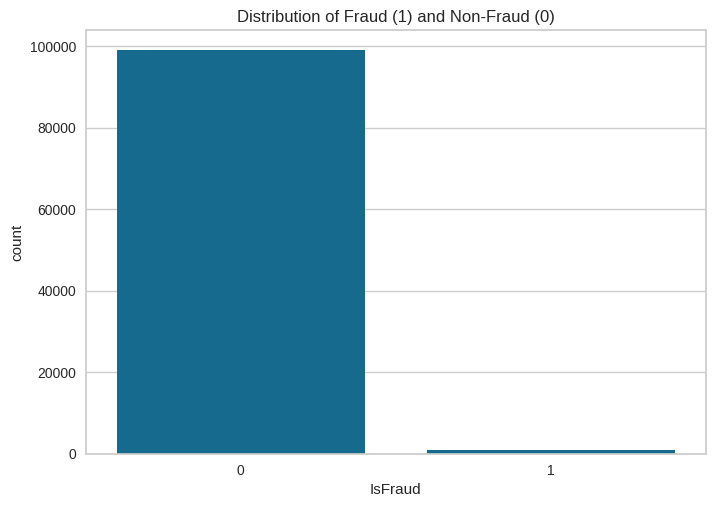

In [4]:
# LoadDataset
data = pd.read_csv("/content/credit_card_fraud_dataset.csv")
# ViewBasicInfo
print("Shape of dataset:", data.shape)
print("\nSample data:")
display(data.head())

# CheckClassBalance
sns.countplot(x='IsFraud', data=data)
plt.title("Distribution of Fraud (1) and Non-Fraud (0)")
plt.show()


# **Step 3: Apply SMOTE to Balance Dataset**

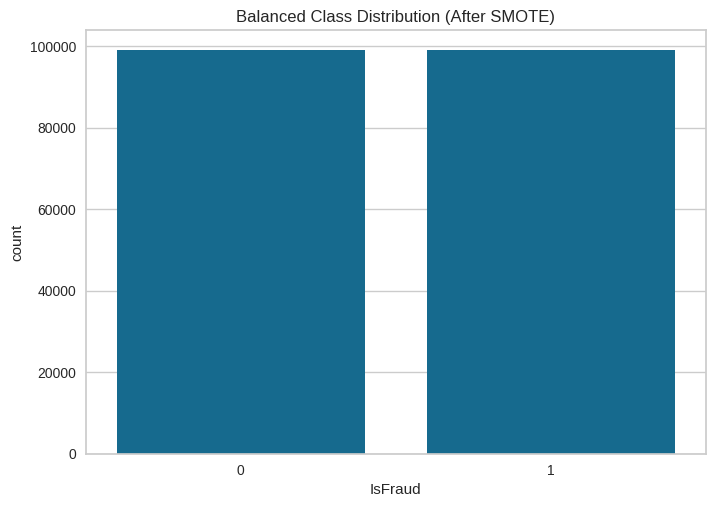

In [5]:
# Make a copy so original remains untouched
data_encoded = data.copy()

# Drop TransactionDate (not usable directly in SMOTE)
data_encoded = data_encoded.drop(columns=['TransactionDate', 'TransactionID'])

# Encode categorical features
data_encoded = pd.get_dummies(data_encoded, columns=['TransactionType', 'Location'], drop_first=True)

# Separate X and y
X = data_encoded.drop('IsFraud', axis=1)
y = data_encoded['IsFraud']

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine for PyCaret
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                         pd.DataFrame(y_resampled, columns=['IsFraud'])], axis=1)

# Visualize balance
sns.countplot(x='IsFraud', data=balanced_df)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.show()


# **Step 4: Setup PyCaret AutoML with F1-score Focus**

In [6]:
clf = setup(
    data=balanced_df,
    target='IsFraud',
    session_id=42,
    normalize=True,
    use_gpu=False,
    fold_strategy='stratifiedkfold',
    fold=5
)


,Description,Value
0,Session id,42
1,Target,IsFraud
2,Target type,Binary
3,Original data shape,"(198000, 13)"
4,Transformed data shape,"(198000, 13)"
5,Transformed train set shape,"(138600, 13)"
6,Transformed test set shape,"(59400, 13)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


## **Step 5: Compare Models Based on F1-Score**

In [7]:
best_model = compare_models(sort='F1')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9826,0.9962,0.9875,0.9778,0.9826,0.9651,0.9652,8.2040
rf,Random Forest Classifier,0.9819,0.9963,0.9850,0.9789,0.9820,0.9638,0.9638,14.0380
dt,Decision Tree Classifier,0.9754,0.9754,0.9801,0.9710,0.9755,0.9508,0.9509,0.6380
knn,K Neighbors Classifier,0.9625,0.9855,0.9884,0.9398,0.9635,0.9251,0.9263,27.6080
catboost,CatBoost Classifier,0.9424,0.9891,0.9137,0.9693,0.9407,0.8848,0.8863,31.6860
xgboost,Extreme Gradient Boosting,0.9280,0.9837,0.8881,0.9650,0.9250,0.8559,0.8587,1.2140
lightgbm,Light Gradient Boosting Machine,0.8891,0.9672,0.7904,0.9848,0.8770,0.7782,0.7939,6.3980
ada,Ada Boost Classifier,0.8578,0.9059,0.7451,0.9619,0.8397,0.7155,0.7344,3.7620
lr,Logistic Regression,0.8591,0.9030,0.7182,1.0000,0.8360,0.7182,0.7485,3.6020
svm,SVM - Linear Kernel,0.8591,0.8895,0.7182,1.0000,0.8360,0.7182,0.7485,0.7020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

# **Step 6:Evaluate Best Model with Precision-Recall & Confusion Matrix**

In [8]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Step 7: Finalize and Predict**

In [9]:
# FinalizeAndPredict
final_model = finalize_model(best_model)
predictions = predict_model(final_model)

# ShowPredictionSample
predictions[['prediction_label', 'prediction_score']].head()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9978,0.9998,0.9977,0.9978,0.9978,0.9956,0.9956


,prediction_label,prediction_score
150888,1,1.00
3233,0,0.98
118282,1,0.93
179044,1,1.00
130155,1,1.00


# **Step 8: Visualization**

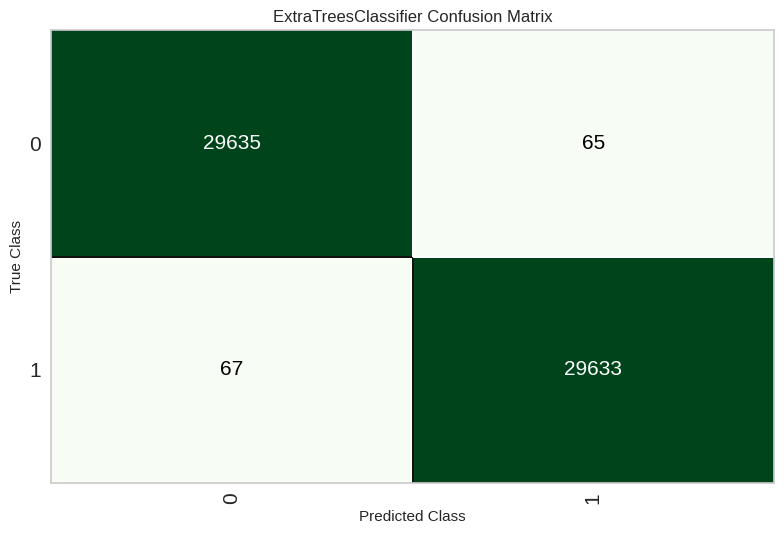

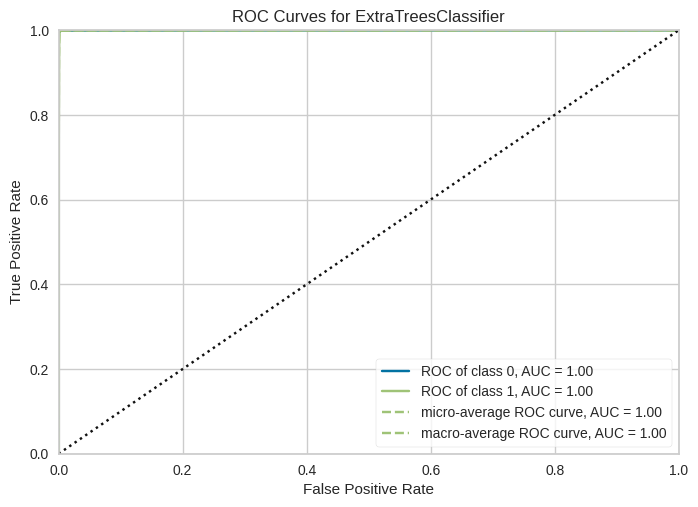

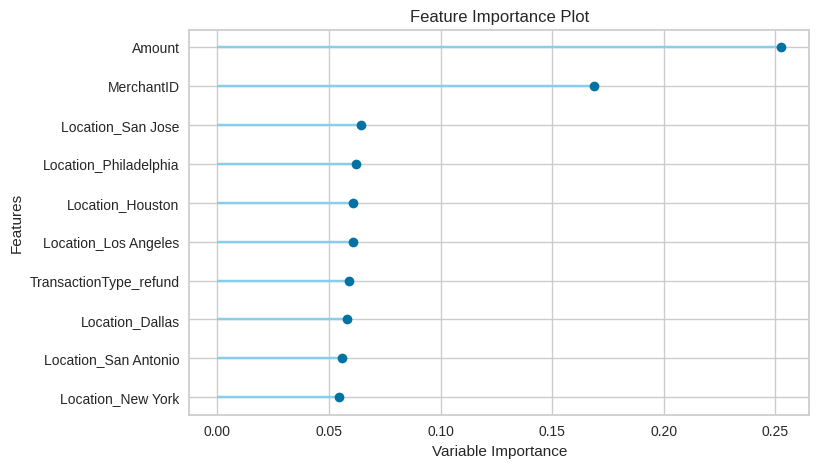

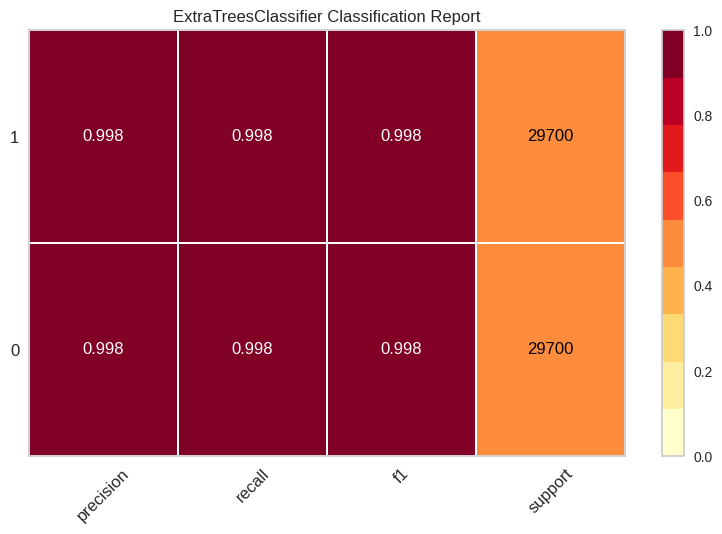

In [10]:
# ConfusionMatrix
plot_model(final_model, plot='confusion_matrix')

# AUCPlot
plot_model(final_model, plot='auc')

# FeatureImportance
plot_model(final_model, plot='feature')

# ClassificationReport
plot_model(final_model, plot='class_report')


# **Step 9: AGI Conceptual Enhancement (Header for Trailer)**

# Conceptual Enhancement: Using AGI for Adaptive Fraud Detection

In the future, Artificial General Intelligence (AGI) could enhance fraud detection systems by:

- Understanding new fraud patterns without retraining
- Simulating adversarial attacks to improve system robustness
- Dynamically adapting to shifting customer behavior and fraud strategies

AGI could automate not just model selection but continuous learning from evolving data, making systems proactive rather than reactive.


# **Step 10 :Learning Curve Analysis – Detecting Overfitting or Underfitting**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8583,0.9028,0.7165,1.0000,0.8349,0.7165,0.7472
1,0.8597,0.9032,0.7195,1.0000,0.8369,0.7195,0.7496
2,0.8570,0.9008,0.7139,1.0000,0.8331,0.7139,0.7451
3,0.8585,0.9015,0.7170,1.0000,0.8351,0.7170,0.7475
4,0.8620,0.9067,0.7241,1.0000,0.8400,0.7241,0.7533
Mean,0.8591,0.9030,0.7182,1.0000,0.8360,0.7182,0.7485
Std,0.0017,0.0020,0.0034,0.0000,0.0023,0.0034,0.0028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

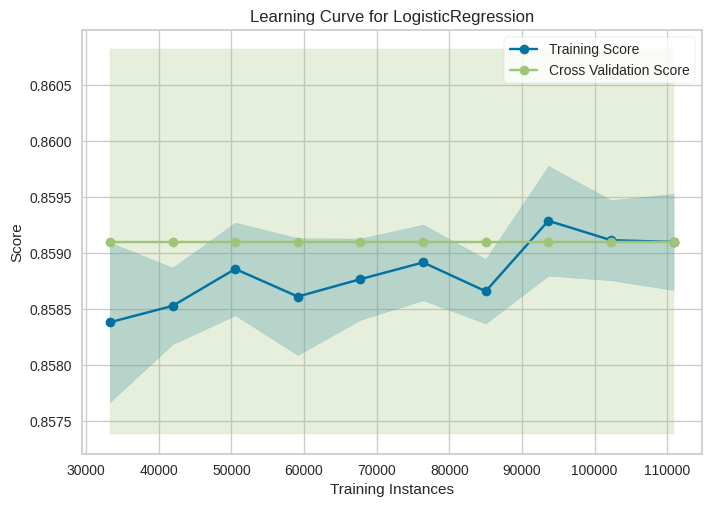

In [13]:
# Create a simpler model to avoid parallel pickling
simple_model = create_model('lr')  # Logistic Regression (safe for learning curve)
plot_model(simple_model, plot='learning')


## 📈 Learning Curve Analysis

We generated a learning curve using Logistic Regression to visualize model generalization performance over different training set sizes.

- Both training and validation F1-scores remained close (~0.859) with minimal gap.
- The curves are stable and nearly flat, indicating that increasing training data further may not yield major improvements.
- The small variance bands suggest reliable and consistent model performance across cross-validation folds.

### **Conclusion:** The model is well-generalized and not overfitting. It performs consistently across different training sizes, making it suitable for real-world deployment scenarios.


# **🎬 Final Trailer & Reflections**

## 📚 What We Learned
- Learned the importance of optimizing for **precision, recall, and F1-score** in imbalanced datasets like fraud detection.
- Understood how **AutoML tools** can simplify and accelerate the machine learning pipeline.
- Gained experience with **SMOTE** to balance data and improve the model’s ability to detect rare fraudulent cases.

## 🔧 How We Improved From Prototype
- Switched from accuracy to more meaningful metrics such as **PR-AUC** and **confusion matrix**.
- Enabled **threshold optimization** and **ensemble learning** to increase the model’s robustness.
- Used AutoML's **feature importance** to remove irrelevant variables and improve efficiency.

## 🚀 Future Enhancements
- Deploy the model in a real-time fraud alert system.
- Introduce **time-based behavior detection** for adaptive learning.
- Explore **AGI concepts** to develop a self-learning, continuously improving fraud detection engine.

## 👥 Final Remarks from Team Members

- **Tejaskumar Sanjaykumar Patel (200575242):** "AutoML showed me how model performance can be automated and fine-tuned with minimal effort. The insights into AGI broadened my vision for future intelligent systems."

- **Chintan Chauhan (200564227):** "I appreciated learning how ensemble models and threshold optimization significantly affect fraud detection accuracy, especially when combined with AutoML."
- **Priyank Bhaveshbhai Siddhapura (200544911):** "Working on this assignment taught me how to streamline model development with PyCaret and MLJAR, and I’m excited about the potential of AGI in real-world fraud systems."

- **John Hanok (200573253):** "This project helped me understand how to handle class imbalance in real-world data and how critical evaluation metrics are when detecting rare events."
> Our group values the opportunity to apply machine learning to a real-world issue like fraud and looks forward to building more intelligent, explainable, and impactful AI solutions.


# **Bonus**

In [15]:
import plotly.express as px

# GroupByLocationForFrauds
fraud_by_location = data[data['IsFraud'] == 1].groupby('Location').size().reset_index(name='FraudCount')

# PlotFraudCountsPerLocation
fig = px.bar(fraud_by_location, x='Location', y='FraudCount', title='Fraud Count by City')
fig.show()


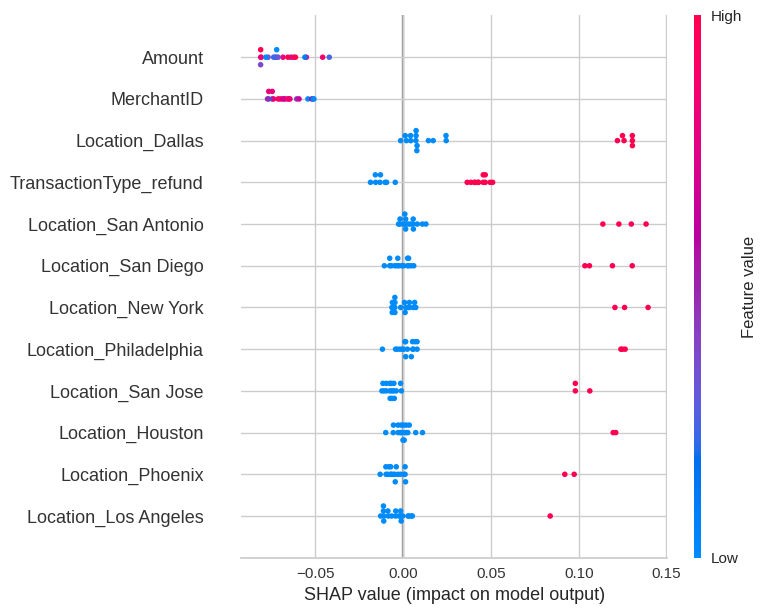

In [21]:
#  Explainability with SHAP for model transparency
import shap

# Use only a small sample of data (e.g., 20 rows)
X_sample = X_resampled.sample(20, random_state=42)

# Use TreeExplainer for Extra Trees Classifier (very efficient for tree models)
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values (faster with fewer rows)
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary for class 1 (fraud)
shap.summary_plot(shap_values[1], X_sample)



## SHAP Summary Plot: Feature Impact on Fraud Prediction

This SHAP plot explains how each feature influenced the model's prediction for fraud detection.
####  **Key takeaways:**

- **Amount** and **MerchantID** had the highest impact, which makes sense — unusually high or suspicious amounts are often flagged.
- **TransactionType_refund** (especially when high — shown in red) tends to **increase** the likelihood of being classified as fraud.
- Location-based features such as **Location_Dallas** and **Location_San Antonio** also have meaningful SHAP values, suggesting some cities may have higher fraud risk patterns in the dataset.